In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SK-learn libraries for learning.
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.colors import LogNorm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler


## Import Data

In [2]:
cleaned_df=pd.read_csv('cleaned_wildfire_data.csv').drop(['Unnamed: 0','_id','Event'],axis=1)
cleaned_df.head()

,Latitude,Longitude,Size,log_sizes,size_category,temperature_14,temperature_13,temperature_12,temperature_11,temperature_10,...,windSpeed5,windSpeed6,windSpeed7,windSpeed8,windSpeed9,windSpeed10,windSpeed11,windSpeed12,windSpeed13,windSpeed14
0,33.6681,-117.50139,100.0,4.605170,class_d,48.221250,52.325833,55.353750,52.667083,48.797917,...,3.646667,2.427500,4.275833,1.949583,2.096250,1.935833,1.428750,2.269583,1.633333,1.618333
1,33.0333,-116.83389,25.0,3.218876,class_c,48.305833,46.069583,44.835417,39.776667,37.474167,...,1.526667,1.640417,1.833333,5.261250,4.941250,1.846250,2.011250,7.476250,5.292083,2.992083
2,37.3683,-118.35833,840.0,6.733402,class_e,40.872500,41.335833,49.464583,50.744583,55.579167,...,3.337500,2.846250,5.654583,4.394583,2.933750,2.271250,2.413333,2.819167,5.687500,6.950417
3,33.8692,-117.68361,892.0,6.793466,class_e,55.987500,59.727083,60.797917,62.654167,64.841250,...,5.224583,4.270417,2.530000,4.327917,5.611250,3.257917,3.257083,3.121667,2.863750,2.850417
4,32.8689,-116.86667,15.0,2.708050,class_c,54.468750,53.435833,55.019167,58.447083,62.486667,...,3.899167,4.002500,3.761667,6.027083,3.868333,2.800000,3.557500,3.774583,4.250417,3.922083


In [ ]:
cleaned_df = cleaned_df[cleaned_df.columns.drop(list(cleaned_df.filter(regex='Latitude')))]
cleaned_df = cleaned_df[cleaned_df.columns.drop(list(cleaned_df.filter(regex='Longitude')))]

In [3]:
#Split data into X's (features) and Y's (labels)
X= cleaned_df.drop(columns='size_category')
y= cleaned_df['size_category']

X_std = StandardScaler().fit_transform(X)

In [4]:
len(X)

681

In [5]:
len(y)

681

In [6]:
train_d, dev_d, test_d = np.split(X.sample(frac=1, random_state=42), [int(.6*len(X)), int(.8*len(X))])


In [7]:
train_d.head()

,Latitude,Longitude,Size,log_sizes,temperature_14,temperature_13,temperature_12,temperature_11,temperature_10,temperature_9,...,windSpeed5,windSpeed6,windSpeed7,windSpeed8,windSpeed9,windSpeed10,windSpeed11,windSpeed12,windSpeed13,windSpeed14
648,33.68194,-117.39972,188.0,5.236442,73.776667,73.557917,74.040000,73.537917,72.351250,73.099167,...,2.262500,2.112500,1.738333,1.844167,1.837500,1.867083,2.002083,1.996250,1.927917,2.248333
296,34.31100,-117.32200,4100.0,8.318742,64.466667,57.216250,55.025000,50.965417,47.996667,55.321250,...,1.065833,1.405833,2.002500,2.440417,2.578333,2.952917,2.266667,4.623750,2.554167,2.536250
63,36.68390,-119.21611,150.0,5.010635,87.258333,87.747917,84.630417,81.019167,80.775000,81.937500,...,2.191667,1.915000,1.138333,1.995833,1.856250,1.873750,1.972083,1.659583,2.586667,2.278750
320,34.77900,-120.09000,25000.0,10.126631,59.758750,61.035417,62.762083,60.147500,58.266250,60.171250,...,2.471250,1.929167,2.868333,2.996250,2.430833,2.020833,2.118750,2.981250,2.673333,2.871667
101,33.44360,-117.42389,200.0,5.298317,66.606250,64.455833,65.207917,65.526667,65.628333,64.033750,...,1.880000,2.130833,2.150417,2.744167,1.798750,1.590000,1.427917,1.802083,1.683750,1.746250


In [8]:
train_l, dev_l, test_l = np.split(y.sample(frac=1, random_state=42), [int(.6*len(y)), int(.8*len(y))])


In [9]:
train_l.head()

648    class_d
296    class_f
63     class_d
320    class_g
101    class_d
Name: size_category, dtype: object

In [10]:
train_data = train_d.reset_index(drop=True)
test_data = test_d.reset_index(drop=True)
train_labels = train_l.reset_index(drop=True)
test_labels = test_l.reset_index(drop=True)
dev_data = dev_d.reset_index(drop=True)
dev_labels = dev_l.reset_index(drop=True)

In [33]:
train_data_pca = train_data.drop(columns = ['Latitude', 'Longitude', 'Size', 'log_sizes'])
test_data_pca = test_data.drop(columns = ['Latitude', 'Longitude', 'Size', 'log_sizes'])
train_labels_pca = train_labels.drop(columns = ['Latitude', 'Longitude', 'Size', 'log_sizes'])
test_labels_pca = test_labels.drop(columns = ['Latitude', 'Longitude', 'Size', 'log_sizes'])
dev_data_pca = dev_data.drop(columns = ['Latitude', 'Longitude', 'Size', 'log_sizes'])
dev_labels_pca = dev_labels.drop(columns = ['Latitude', 'Longitude', 'Size', 'log_sizes'])

In [34]:
train_data.head()

,Latitude,Longitude,Size,log_sizes,temperature_14,temperature_13,temperature_12,temperature_11,temperature_10,temperature_9,...,windSpeed5,windSpeed6,windSpeed7,windSpeed8,windSpeed9,windSpeed10,windSpeed11,windSpeed12,windSpeed13,windSpeed14
0,33.68194,-117.39972,188.0,5.236442,73.776667,73.557917,74.040000,73.537917,72.351250,73.099167,...,2.262500,2.112500,1.738333,1.844167,1.837500,1.867083,2.002083,1.996250,1.927917,2.248333
1,34.31100,-117.32200,4100.0,8.318742,64.466667,57.216250,55.025000,50.965417,47.996667,55.321250,...,1.065833,1.405833,2.002500,2.440417,2.578333,2.952917,2.266667,4.623750,2.554167,2.536250
2,36.68390,-119.21611,150.0,5.010635,87.258333,87.747917,84.630417,81.019167,80.775000,81.937500,...,2.191667,1.915000,1.138333,1.995833,1.856250,1.873750,1.972083,1.659583,2.586667,2.278750
3,34.77900,-120.09000,25000.0,10.126631,59.758750,61.035417,62.762083,60.147500,58.266250,60.171250,...,2.471250,1.929167,2.868333,2.996250,2.430833,2.020833,2.118750,2.981250,2.673333,2.871667
4,33.44360,-117.42389,200.0,5.298317,66.606250,64.455833,65.207917,65.526667,65.628333,64.033750,...,1.880000,2.130833,2.150417,2.744167,1.798750,1.590000,1.427917,1.802083,1.683750,1.746250


In [35]:
train_data_pca

,temperature_14,temperature_13,temperature_12,temperature_11,temperature_10,temperature_9,temperature_8,temperature_7,temperature_6,temperature_5,...,windSpeed5,windSpeed6,windSpeed7,windSpeed8,windSpeed9,windSpeed10,windSpeed11,windSpeed12,windSpeed13,windSpeed14
0,73.776667,73.557917,74.040000,73.537917,72.351250,73.099167,73.358333,69.554167,70.938750,73.073750,...,2.262500,2.112500,1.738333,1.844167,1.837500,1.867083,2.002083,1.996250,1.927917,2.248333
1,64.466667,57.216250,55.025000,50.965417,47.996667,55.321250,56.441250,56.250000,57.784167,54.393333,...,1.065833,1.405833,2.002500,2.440417,2.578333,2.952917,2.266667,4.623750,2.554167,2.536250
2,87.258333,87.747917,84.630417,81.019167,80.775000,81.937500,82.001667,83.228333,84.235000,82.009167,...,2.191667,1.915000,1.138333,1.995833,1.856250,1.873750,1.972083,1.659583,2.586667,2.278750
3,59.758750,61.035417,62.762083,60.147500,58.266250,60.171250,60.765833,60.584167,60.810000,62.678750,...,2.471250,1.929167,2.868333,2.996250,2.430833,2.020833,2.118750,2.981250,2.673333,2.871667
4,66.606250,64.455833,65.207917,65.526667,65.628333,64.033750,63.027500,64.606250,65.991250,66.312083,...,1.880000,2.130833,2.150417,2.744167,1.798750,1.590000,1.427917,1.802083,1.683750,1.746250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,66.015833,65.574583,66.445833,68.836250,66.493333,68.527917,69.448750,71.537500,73.838333,74.045417,...,3.277083,2.992917,2.881250,3.325417,2.928750,3.162917,3.297917,2.942083,2.921250,2.804583
404,79.960833,82.677917,83.871667,78.967083,70.382917,62.769583,65.687500,72.401667,78.404167,79.909167,...,1.453750,1.316667,1.049583,0.885833,2.071667,1.007500,0.822500,0.773333,0.891667,0.762500
405,74.338333,71.027083,71.311667,73.478750,76.977083,78.625833,80.994583,82.539583,80.126250,76.617083,...,3.284583,3.152917,3.416667,3.370417,3.457500,3.460833,2.737500,3.685417,3.655417,4.834583
406,72.021250,70.245000,66.941667,67.107083,67.705833,69.703333,70.135417,70.000000,70.362083,74.507083,...,2.623750,2.510417,4.200833,4.802083,1.939583,2.281250,1.811667,1.346667,3.069167,1.647917


In [12]:
print(train_labels)

0      class_d
1      class_f
2      class_d
3      class_g
4      class_d
        ...   
403    class_d
404    class_c
405    class_d
406    class_c
407    class_e
Name: size_category, Length: 408, dtype: object


Model:\
1) Naive Bayes (Pan)\
    -Bernoulli
    -Multinomial
2) k-nn & K-means (Pauline)
3) Gaussian and PCA (Hannah)
4) Logistic Regression (Cisco)
5) Linear Regression (Josh) (optional)



## Naive Bayes (Pan)

## k-nn & K-means (Pauline)

Producing a k-Nearest-Neighbords model with various k values. Evaluating the performance of the model with a classification report. 

## PCA (Hannah)

In [13]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

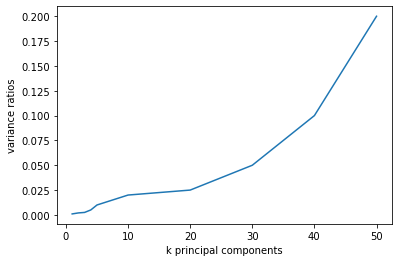

In [37]:
#PCA Model 

#Principal components (k in list)
components = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    
#Create empty list to store variation ratios
store = np.empty(len(components))
    
#for loop to do PCA on each component value in list
for i in components:
    pca = PCA(n_components = i)
    pca.fit_transform(train_data_pca)
    variance_ratio = pca.explained_variance_ratio_.cumsum()
        
#Plot components vs variance ratios
plt.plot(components, store)
plt.xlabel('k principal components')
plt.ylabel('variance ratios')
plt.show()

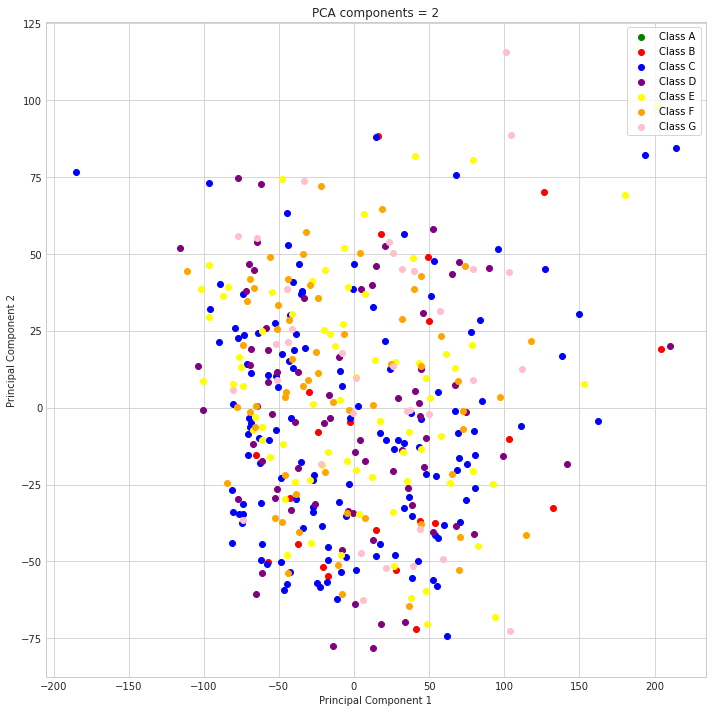

In [39]:
#Create PCA model and fit on training data 
pca = PCA(n_components = 2)
y_pca = pca.fit_transform(train_data_pca)


#Create plot of 7 PCA components, label with color by class  
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize = (10,10))
    for lab, col in zip(('class_a', 'class_b', 'class_c', 'class_d', 'class_e', 'class_f', 'class_g'),
                        ('green', 'red', 'blue', 'purple', 'yellow', 'orange', 'pink')):
        plt.scatter(y_pca[train_labels_pca==lab, 0],
                    y_pca[train_labels_pca==lab, 1],
                    label=lab,
                    c=col)
            
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA components = 2')
plt.legend(["Class A", "Class B", "Class C", "Class D", "Class E", "Class F", "Class G"], loc='upper right')
#plt.xlim(-150000, 300000)
plt.tight_layout()
plt.show()
        



## Logistic Regression (Cisco)

## Linear Regression (Josh) 